In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# Task 2.1 - Feature Engineering

In [14]:
df = pd.read_pickle("../OLA-1/data/interim/task1_data_processed.pkl")

21-40    238
41-60     57
61+       13
0-20       2
Name: Age_Group, dtype: int64


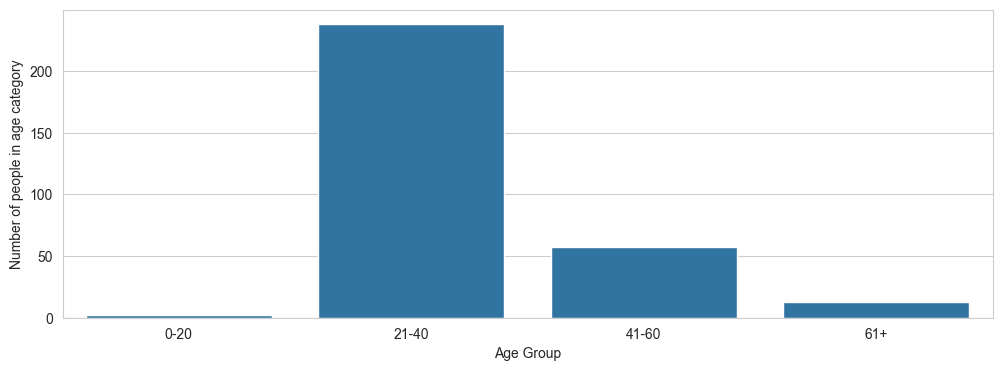

In [52]:
def bin_age(
    dataset,
    column_name="Age",
    bins=[0, 20, 40, 60, np.inf],
    labels=["0-20", "21-40", "41-60", "61+"],
):
    """
    Bins the age column of the dataset into specified categories.

    Args:
        dataset: The dataset containing the data
        column_name: The name of the col to be binned.
        bins: The edges of the bins as a list.
        labels: The labels for the bins.

    Returns: A dataset with an additional column for the age_groups.

    """
    dataset["Age_Group"] = pd.cut(
        dataset[column_name], bins=bins, labels=labels, include_lowest=True
    )
    return dataset

df = bin_age(df)

print(df["Age_Group"].value_counts())
plt.figure(figsize=(12,4))
sns.countplot(x=df["Age_Group"],data=df)
plt.xlabel('Age Group')
plt.ylabel('Number of people in age category')
plt.savefig("./figures/age_group_histogram.png")
plt.show()

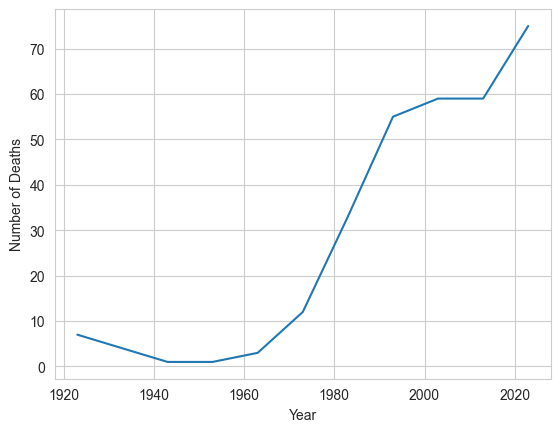

In [53]:
df['Date'] = pd.to_datetime(df['Date'], format='%B %d, %Y', errors='coerce')
dategroups = df.groupby(pd.Grouper(key='Date', freq='10Y')).size().reset_index(name='count')
dategroups.set_index('Date', inplace=True)

plt.plot(dategroups.index, dategroups["count"])
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.savefig("./figures/deaths_by_year_graph.png")
plt.show()

#### Implementing one-hot encoding for categorical variables

In [34]:
ohe_age = pd.get_dummies(df, columns=["Age_Group"])
ohe_age.head(20)

,Name,Date,Age,Expedition,Nationality,Cause of death,Location,Age_outlier,Age_Group_0-20,Age_Group_21-40,Age_Group_41-60,Age_Group_61+
0,Dorje,1922-06-07,38.0,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col,True,0,1,0,0
1,Lhakpa,1922-06-07,38.0,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col,True,0,1,0,0
2,Norbu,1922-06-07,38.0,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col,True,0,1,0,0
3,Pasang,1922-06-07,38.0,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col,True,0,1,0,0
4,Pema,1922-06-07,38.0,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col,True,0,1,0,0
5,Sange,1922-06-07,38.0,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col,True,0,1,0,0
6,Temba,1922-06-07,38.0,1922 British Mount Everest Expedition,Nepal,Avalanche,Below North Col,True,0,1,0,0
7,Man Bahadur,1924-05-13,38.0,1924 British Mount Everest Expedition,Nepal,Pneumonia,Above Rongbuk B.C.,True,0,1,0,0
8,Lance-Naik Shamsherpun,1924-05-17,38.0,1924 British Mount Everest Expedition,Nepal,Brain hemorrhage,Above Rongbuk B.C.,True,0,1,0,0
9,Andrew Irvine,1924-06-09,22.0,1924 British Mount Everest Expedition,United Kingdom,Unknown. Body never found,N.E. Ridge,False,0,1,0,0


In [36]:
ohe_cause_of_death = pd.get_dummies(df, columns=["Cause of death"])
ohe_cause_of_death.head(20)

,Name,Date,Age,Expedition,Nationality,Location,Age_outlier,Age_Group,Cause of death_100m fall,"Cause of death_150m fall. He showed signs of exhaustion, dehydration, cerebral oedema, retinal hemorrhages and possible blood clots in his upper legs.",...,Cause of death_Snowboarding accident,Cause of death_Stroke,Cause of death_Stroke (CVA),Cause of death_Succumbed after falling and being suspended above a crevasse during a blizzard,"Cause of death_Suspected HACE (high-altitude cerebral edema), exhaustion, frostbite and exposure.",Cause of death_Suspected altitude sickness,Cause of death_Suspected cardiac arrest,Cause of death_Unknown cause,Cause of death_Unknown. Body never found,Cause of death_by fall
0,Dorje,1922-06-07,38.0,1922 British Mount Everest Expedition,Nepal,Below North Col,True,21-40,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Lhakpa,1922-06-07,38.0,1922 British Mount Everest Expedition,Nepal,Below North Col,True,21-40,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Norbu,1922-06-07,38.0,1922 British Mount Everest Expedition,Nepal,Below North Col,True,21-40,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Pasang,1922-06-07,38.0,1922 British Mount Everest Expedition,Nepal,Below North Col,True,21-40,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Pema,1922-06-07,38.0,1922 British Mount Everest Expedition,Nepal,Below North Col,True,21-40,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Sange,1922-06-07,38.0,1922 British Mount Everest Expedition,Nepal,Below North Col,True,21-40,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Temba,1922-06-07,38.0,1922 British Mount Everest Expedition,Nepal,Below North Col,True,21-40,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Man Bahadur,1924-05-13,38.0,1924 British Mount Everest Expedition,Nepal,Above Rongbuk B.C.,True,21-40,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Lance-Naik Shamsherpun,1924-05-17,38.0,1924 British Mount Everest Expedition,Nepal,Above Rongbuk B.C.,True,21-40,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Andrew Irvine,1924-06-09,22.0,1924 British Mount Everest Expedition,United Kingdom,N.E. Ridge,False,21-40,0,0,...,0,0,0,0,0,0,0,0,1,0


# 2.2 Descriptive statistics

In [45]:
age_descriptive_stats = df["Age"].describe()

mean = df[['Age']].mean()
median = df[['Age']].median()
std = df[['Age']].std()

# For categorical features, count the frequency of each category.
freq_name = df["Name"].value_counts()
freq_date = df["Date"].value_counts()
freq_age_group = df["Age_Group"].value_counts()
freq_nationality = df["Nationality"].value_counts()
freq_cod = df["Cause of death"].value_counts()
freq_loc = df["Location"].value_counts()
freq_exp = df['Expedition'].value_counts()

print(age_descriptive_stats)


count    310.000000
mean      39.216129
std        8.862217
min       19.000000
25%       37.250000
50%       38.000000
75%       38.000000
max       85.000000
Name: Age, dtype: float64


# 2.3 Visualization

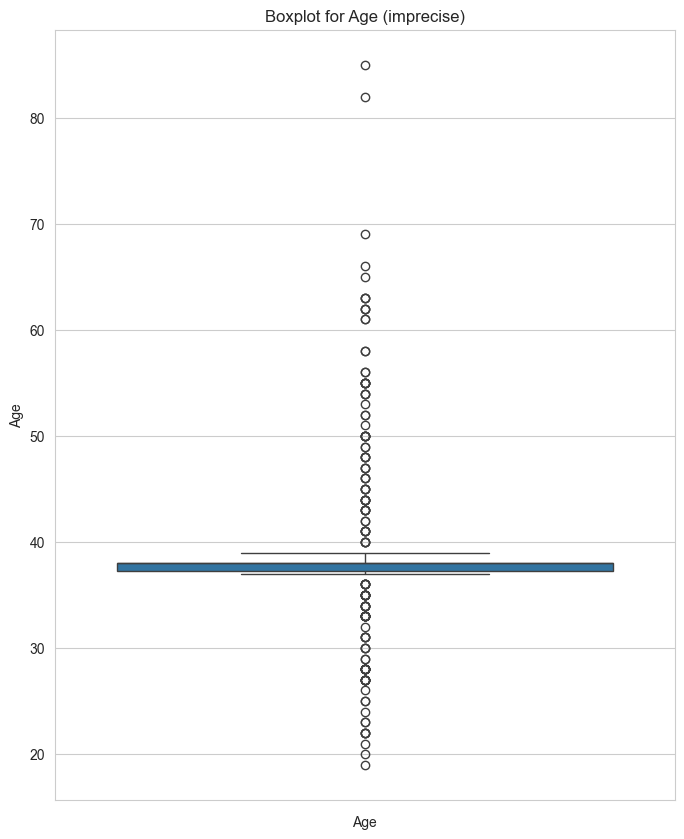

In [54]:
plt.figure(figsize=(8, 10))
sns.boxplot(y=df["Age"])
plt.title("Boxplot for Age (imprecise)")
plt.xlabel("Age")
plt.savefig("./figures/age_boxplot_imprecise.png")
plt.show()

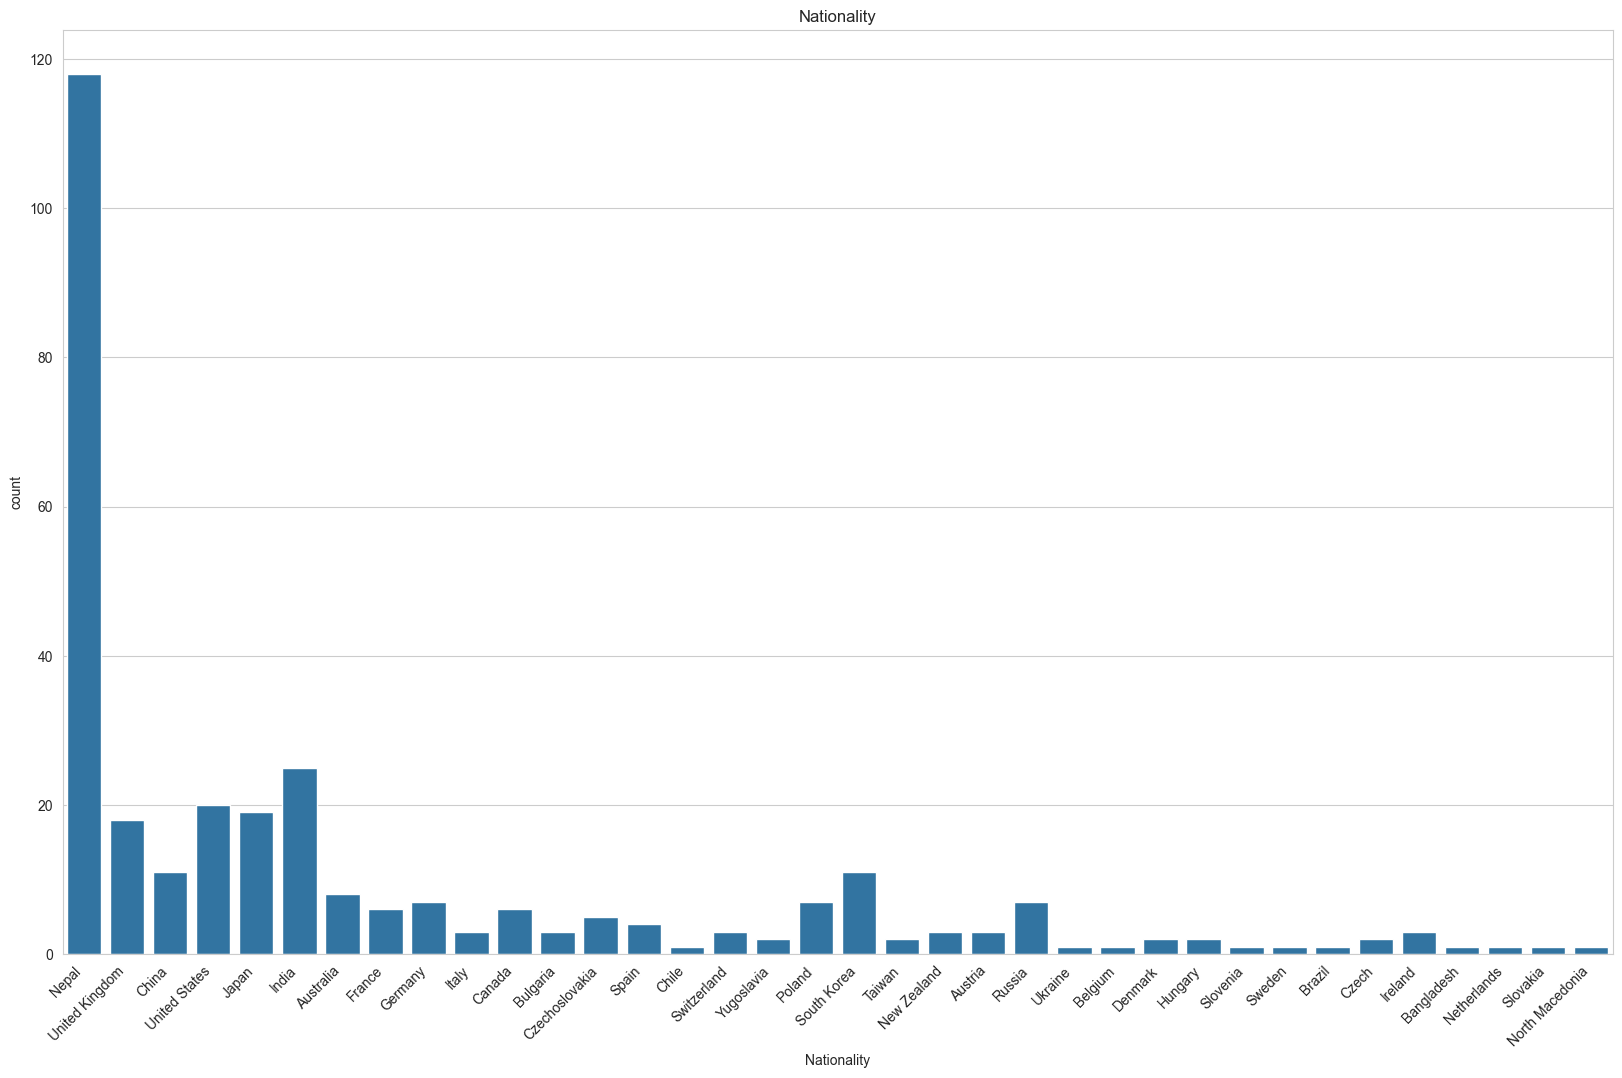

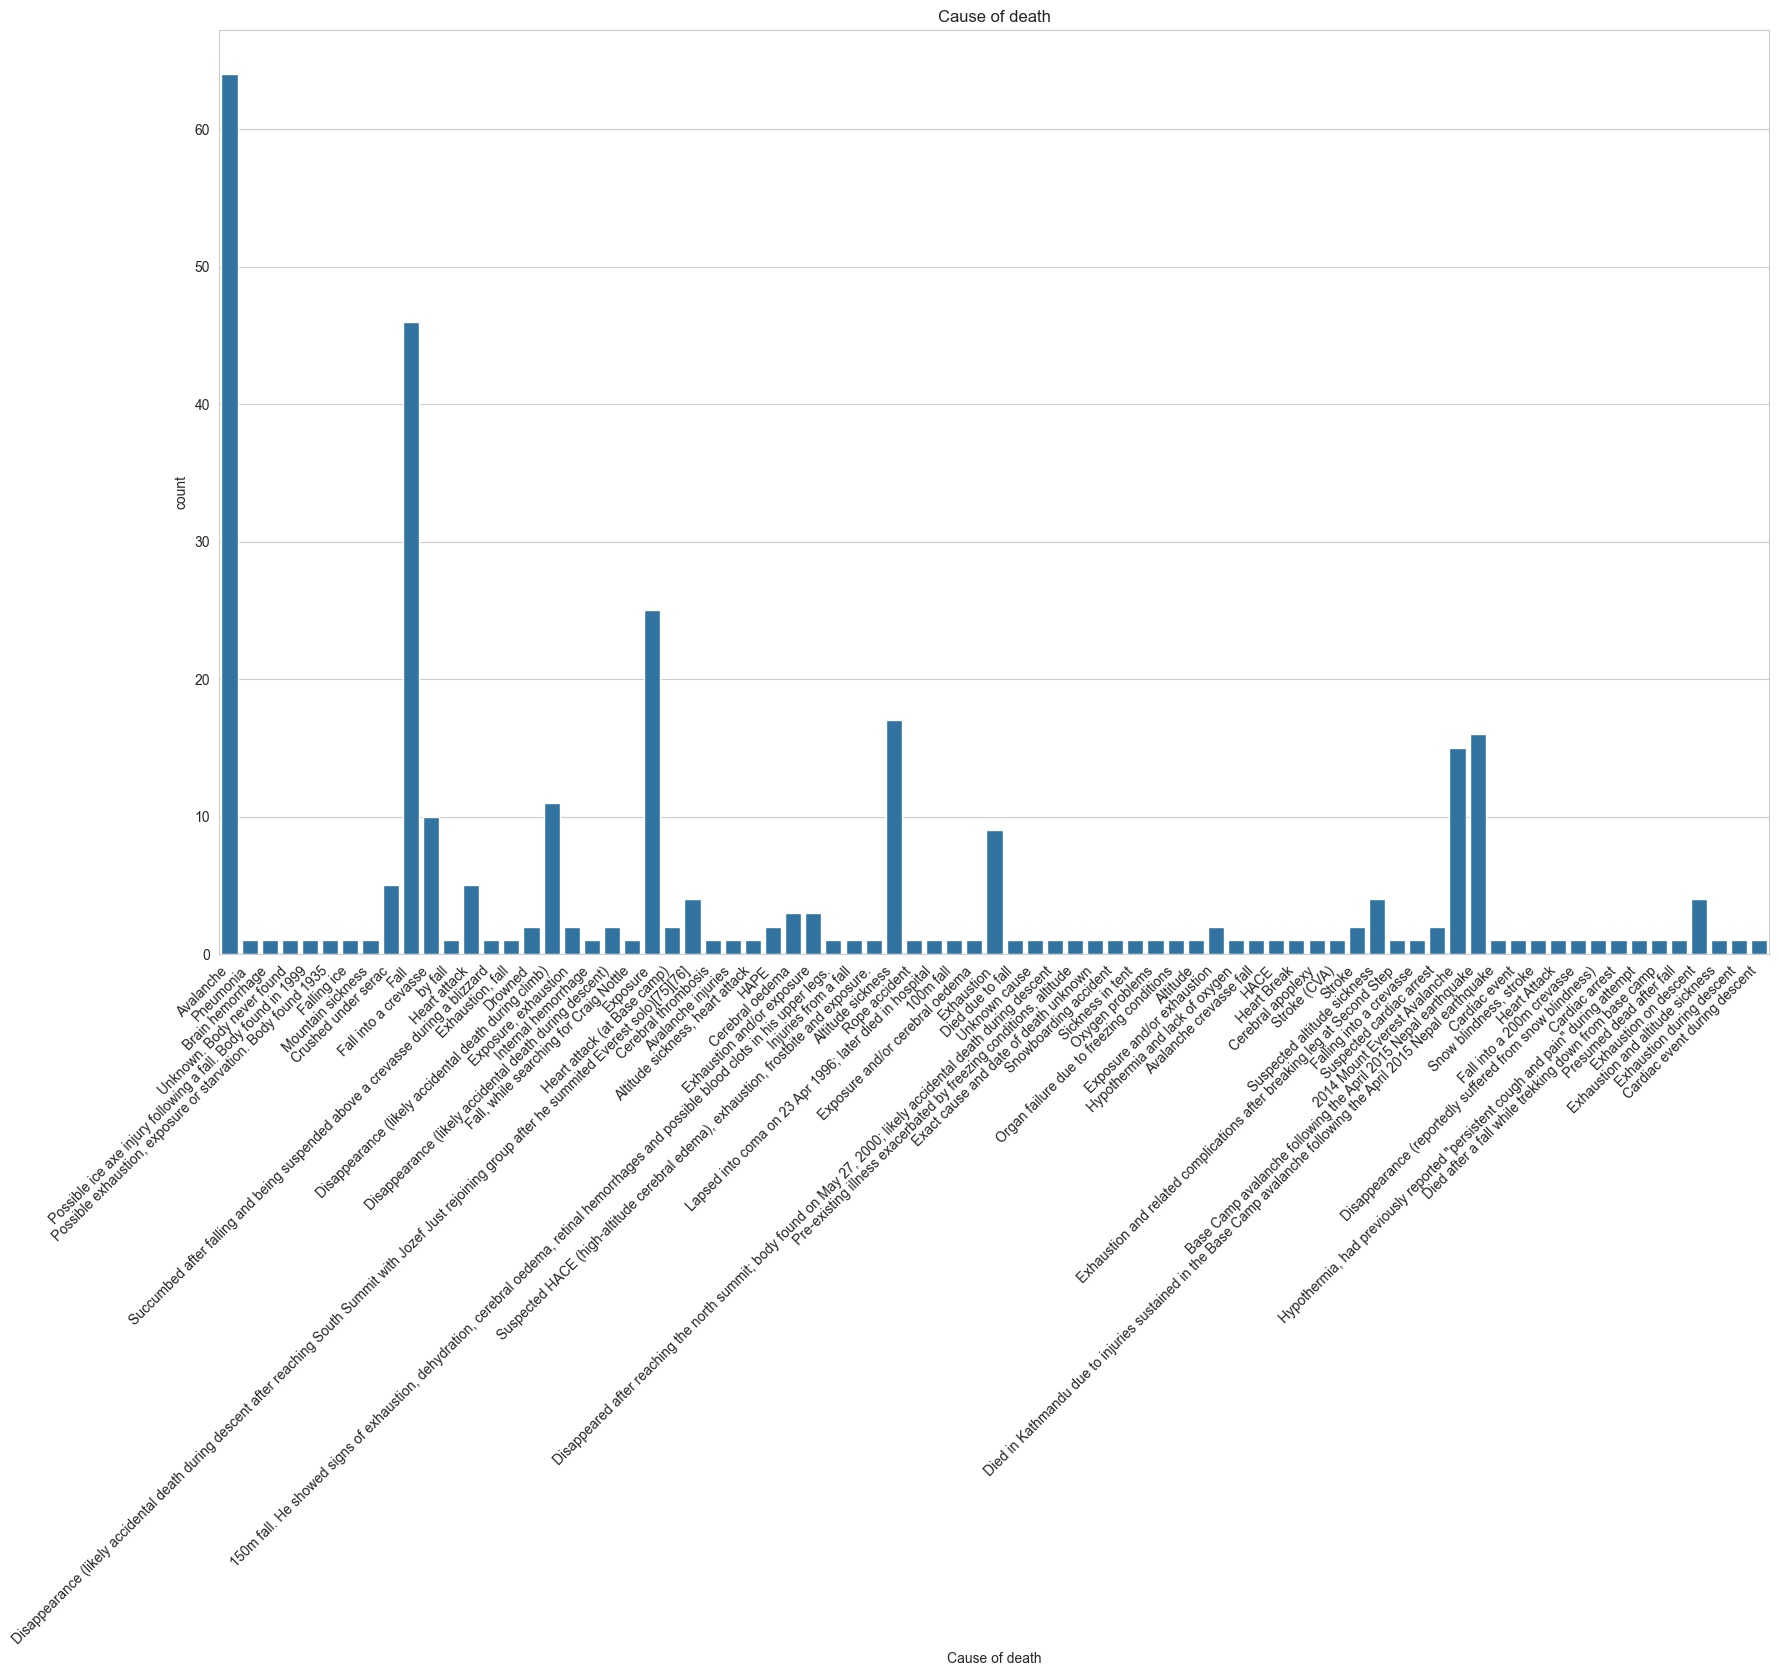

In [55]:
for column in ['Nationality', 'Cause of death']:
    plt.figure(figsize=(20,12))
    plt.xticks(rotation=45,ha="right")
    sns.countplot(x=df[column])
    plt.title(column)
    plt.savefig(f"./figures/{column} (bar_plot)")
    plt.show()

In [51]:
df.to_pickle("../OLA-1/data/interim/task2_data_processed.pkl")